# Explicación de un modelo de regresión lineal

Antes de utilizar los valores de Shapley para explicar modelos complicados, es útil entender cómo funcionan para modelos simples. Uno de los tipos de modelos más simples es la regresión lineal estándar, y a continuación entrenamos un modelo de regresión lineal en el [conjunto de datos de viviendas de California](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). 

Este conjunto de datos consta de 20,640 bloques de casas en California en 1990, donde nuestro objetivo es predecir el logaritmo natural del precio medio de la vivienda a partir de 8 características diferentes:

1. `MedInc` - ingreso medio en el grupo de bloques
2. `HouseAge` - edad media de la vivienda en el grupo de bloques
3. `AveRooms` - número medio de habitaciones por hogar
4. `AveBedrms` - número medio de dormitorios por hogar
5. `Población` - población del grupo de bloques
6. `AveOccup` - número medio de miembros por hogar
7. `Latitud` - latitud del grupo de bloques
8. `Longitud` - longitud del grupo de bloques

## Conjunto de Datos de Viviendas en California

Este es un conjunto de datos obtenido del repositorio StatLib. Aquí se incluye la descripción correspondiente:

Datos de Cartas S&P

Recopilamos información sobre las variables utilizando todos los grupos de bloques en California del Censo de 1990. En esta muestra, un grupo de bloques incluye en promedio a 1425.5 individuos que viven en un área geográficamente compacta. 
* Naturalmente, el área geográfica incluida varía inversamente con la densidad de población. 
* Calculamos distancias entre los centroides de cada grupo de bloques, medidas en latitud y longitud. 
* Excluimos todos los grupos de bloques que informaron cero entradas para las variables independientes y dependientes. 
* Los datos finales contenían 20,640 observaciones sobre 9 variables. 
* La variable dependiente es el $ln((valor medio de la vivienda))$.

```
                                Bols    tols
INTERCEPT                       11.4939 275.7518
MEDIAN INCOME                   0.4790  45.7768
MEDIAN INCOME2                  -0.0166 -9.4841
MEDIAN INCOME3                  -0.0002 -1.9157
ln(MEDIAN AGE)                  0.1570  33.6123
ln(TOTAL ROOMS/ POPULATION)     -0.8582 -56.1280
ln(BEDROOMS/ POPULATION)        0.8043  38.0685
ln(POPULATION/ HOUSEHOLDS)      -0.4077 -20.8762
ln(HOUSEHOLDS)                  0.0477  13.0792

```

El archivo contiene todas las variables. Específicamente, incluye el valor medio de la vivienda, ingreso medio, edad media de la vivienda, total de habitaciones, total de dormitorios, población, hogares, latitud y longitud, en ese orden.

**Referencia**

Pace, R. Kelley y Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

El manuscrito que describe los datos se puede encontrar en [www.spatial-statistics.com](http://www.spatial-statistics.com/). Los datos también están disponibles como archivos de Matlab.

Contacte a [kelley@spatial-statistics.com](mailto:kelley@spatial-statistics.com) o [kelley@pace.am](mailto:kelley@pace.am) si tiene alguna pregunta adicional. Gracias.

- Fuente: [Repositorio StatLib](http://lib.stat.cmu.edu/).
- Características: 20,460 casos, 8 atributos (0 nominales, 8 continuos).
- Descarga: [cal_housing.tgz](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz) (441963 bytes)

## Instalación de dependecias
Para este laboratorio vamos a usar python 3.9.17

In [3]:
!python --version

Python 3.9.17


In [226]:
#@title Liberías
!pip install ipywidgets numpy pandas scikit-learn interpret xgboost seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [172]:
from IPython.display import display, Math, Latex
import numpy as np
import pandas as pd
import seaborn as sns

Debemos instalar la version v0.42.1 de Shap

In [29]:
!pip install shap==0.42.1

In [30]:
!pip show shap

Name: shap
Version: 0.42.1
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /home/fredy/unal/proyecto-shap/.venv/lib/python3.9/site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [3]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


E instalar la version v3.5.3 de Matplotlib para evitar [errores de visualización](https://shap.readthedocs.io/en/latest/release_notes.html#release-v0-42-1)

In [8]:
!pip install matplotlib==3.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 5.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0


In [2]:
!pip show matplotlib

Name: matplotlib
Version: 3.5.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/fredy/unal/proyecto-shap/.venv/lib/python3.9/site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: lime, SALib


## Obtención de conjunto de datos

In [111]:
import shap
X, y = shap.datasets.california(n_points=1000)

**`X` (Matriz de características):** Es una matriz que contiene información sobre las características o variables independientes del conjunto de datos. Cada fila de la matriz representa una observación, y cada columna representa una característica específica. En el contexto del conjunto de datos de California, las características podrían incluir información como ingreso medio, edad de la vivienda, número medio de habitaciones por hogar, etc.

In [112]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [8]:
# Obtener la fila #20
indice_muestra = 20
X.iloc[indice_muestra]

MedInc           2.585900
HouseAge        17.000000
AveRooms         4.814634
AveBedrms        1.030894
Population    1911.000000
AveOccup         3.107317
Latitude        32.570000
Longitude     -117.070000
Name: 14770, dtype: float64

**`y` (Variable de respuesta):** Es un vector que contiene los valores de la variable dependiente que estamos tratando de predecir. En el caso del conjunto de datos de California, podría ser el precio medio de la vivienda u otra medida relacionada.

In [113]:
import pandas as pd
y_df = pd.DataFrame(y)
y_df

,0
0,1.369
1,2.413
2,2.007
3,0.725
4,4.600
...,...
995,1.855
996,1.058
997,3.435
998,2.259


En resumen, `X` contiene las características que se utilizan para hacer predicciones, y `y` contiene las respuestas reales (etiquetas) asociadas con esas características en el conjunto de datos.

## Modelo de regresión lineal simple

En modelos de regresión, especialmente cuando se trabaja con valores que abarcan un rango amplio, como los precios de las viviendas, es común aplicar transformaciones a la variable de respuesta para abordar problemas de sesgo o heterocedasticidad. En este caso, se está utilizando el **logaritmo natural** ($ln$) del precio medio de la vivienda como la variable objetivo.

La transformación logarítmica se elige por varias razones:

1. **Estabilización de la Varianza:** La transformación logarítmica puede ayudar a estabilizar la varianza cuando esta aumenta con el nivel de la variable.
2. **Manejo de Sesgo:** Si la distribución de la variable objetivo está sesgada, la transformación logarítmica puede ayudar a reducir ese sesgo.
3. **Interpretación más Lineal:** La relación entre las variables predictoras y la variable objetivo puede volverse más lineal después de aplicar una transformación logarítmica.

In [114]:
import sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
X100 = shap.utils.sample(X_train, 100)

In [26]:
X_train["MedInc"]

20138     2.6991
18822     2.0650
15081     2.8175
19925     4.3816
13210     4.0096
          ...   
10564     8.7603
6331      5.0142
16020    10.6605
3851      2.2461
19114     6.2034
Name: MedInc, Length: 800, dtype: float64

In [21]:

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Examinando los coeficientes del modelo

La forma más común de comprender un modelo lineal es examinar los coeficientes aprendidos para cada característica. Estos coeficientes nos indican cuánto cambia la salida del modelo cuando cambiamos cada una de las características de entrada:

In [75]:
print("Coeficientes del modelo:\\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model.coef_[i].round(5))

Coeficientes del modelo:\n
MedInc = 0.41027
HouseAge = 0.00903
AveRooms = -0.09932
AveBedrms = 0.6323
Population = 3e-05
AveOccup = -0.23056
Latitude = -0.49566
Longitude = -0.49432


Aquí está una explicación de cada coeficiente:

1. **MedInc (Ingreso Medio):** 0.45769
    - A medida que el ingreso medio en el grupo de bloques aumenta en una unidad, el logaritmo natural del precio medio de la vivienda aumenta en aproximadamente 0.45769 unidades.
2. **HouseAge (Edad Media de la Vivienda):** 0.01153
    - Un aumento de una unidad en la edad media de la vivienda en el grupo de bloques se asocia con un aumento de aproximadamente 0.01153 en el logaritmo natural del precio medio de la vivienda.
3. **AveRooms (Número Medio de Habitaciones por Hogar):** -0.12529
    - Un incremento de una unidad en el número medio de habitaciones por hogar se relaciona con una disminución de aproximadamente 0.12529 en el logaritmo natural del precio medio de la vivienda.
4. **AveBedrms (Número Medio de Dormitorios por Hogar):** 1.04053
    - Aumentar en una unidad el número medio de dormitorios por hogar está asociado con un aumento de aproximadamente 1.04053 en el logaritmo natural del precio medio de la vivienda.
5. **Population (Población):** 5e-05 (0.00005)
    - Cada aumento de una unidad en la población del grupo de bloques se asocia con un aumento muy pequeño, de aproximadamente 0.00005, en el logaritmo natural del precio medio de la vivienda.
6. **AveOccup (Número Medio de Miembros por Hogar):** -0.29795
    - Un aumento de una unidad en el número medio de miembros por hogar está relacionado con una disminución de aproximadamente 0.29795 en el logaritmo natural del precio medio de la vivienda.
7. **Latitude (Latitud):** -0.41204
    - Un aumento de una unidad en la latitud del grupo de bloques se asocia con una disminución de aproximadamente 0.41204 en el logaritmo natural del precio medio de la vivienda.
8. **Longitude (Longitud):** -0.40125
    - Un aumento de una unidad en la longitud del grupo de bloques se relaciona con una disminución de aproximadamente 0.40125 en el logaritmo natural del precio medio de la vivienda.

Estos coeficientes indican cómo cada característica contribuye a la predicción del precio de la vivienda en el modelo de regresión lineal. Un coeficiente positivo sugiere una asociación positiva, mientras que un coeficiente negativo sugiere una asociación negativa. Es importante considerar la magnitud de los coeficientes para evaluar la fuerza de la influencia de cada característica en la predicción.

Si bien los coeficientes son útiles para indicarnos qué sucederá cuando cambiamos el valor de una característica de entrada, por sí solos no son una excelente manera de medir la importancia general de una característica. Esto se debe a que el valor de cada coeficiente depende de la escala de las características de entrada. 

Por ejemplo, si midieramos la edad de una casa en minutos en lugar de años, entonces los coeficientes para la característica HouseAge se convertirían en 0.0115 / (365∗24∗60) = 2.18e-8. Claramente, el número de años desde que se construyó una casa no es más importante que el número de minutos, sin embargo, su valor de coeficiente es mucho mayor. Esto significa que la magnitud de un coeficiente no es  necesariamente una buena medida de la importancia de una característica en un modelo lineal.

<https://scikit-learn.org/stable/modules/partial_dependence.html>

In [217]:
y_pred = model.predict(X_test)

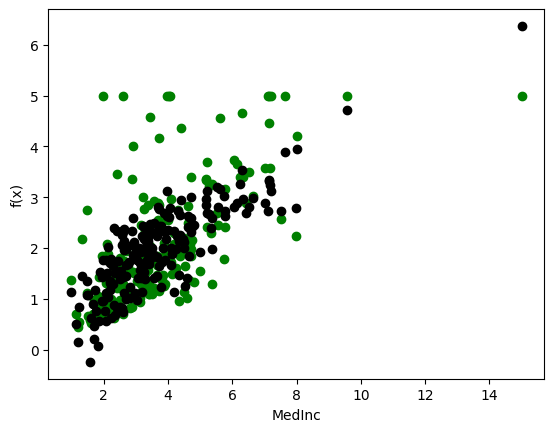

In [218]:
from matplotlib import pyplot as plt
plt.scatter(X_test["MedInc"], y_test,color='g')
plt.scatter(X_test["MedInc"], y_pred,color='k')
plt.xlabel("MedInc")
plt.ylabel("f(x)")
plt.show()

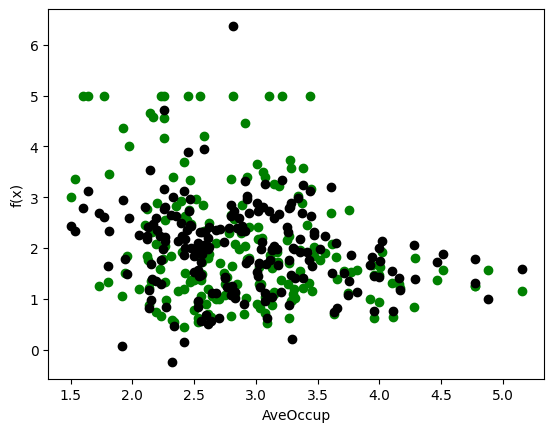

In [46]:
from matplotlib import pyplot as plt
plt.scatter(X_test["AveOccup"], y_test,color='g')
plt.scatter(X_test["AveOccup"], y_pred,color='k')
plt.xlabel("AveOccup")
plt.ylabel("f(x)")
plt.show()

### Una imagen más completa mediante gráficos de dependencia parcial

Para comprender la importancia de una característica en un modelo, es necesario entender tanto cómo el cambio en esa característica afecta la salida del modelo, como también la distribución de los valores de esa característica. Para visualizar esto en un modelo lineal, podemos construir un gráfico de dependencia parcial clásico y mostrar la distribución de los valores de la característica como un histograma en el eje x:

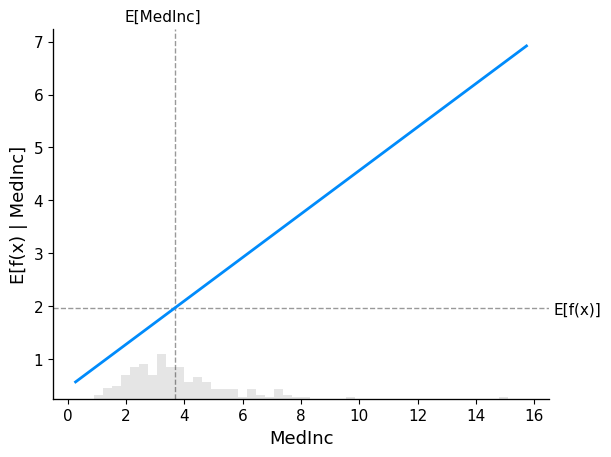

Valor en la muestra 20: 2.5859


In [248]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)
print("Valor en la muestra 20:",X.iloc[indice_muestra]["MedInc"])

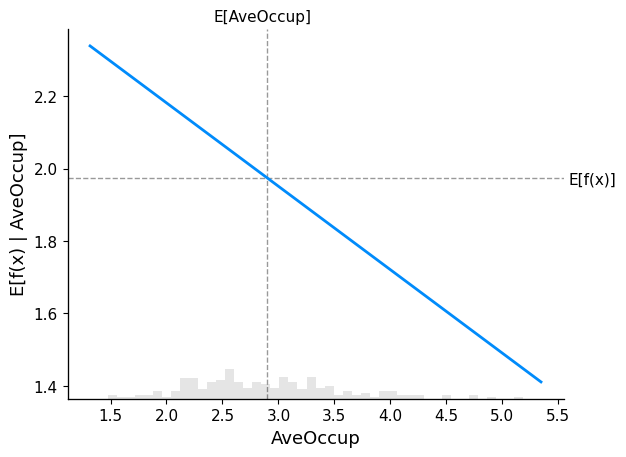

Valor en la muestra 20: 3.107317073170732
Promedio de MedInc:  2.9328615962197926


In [80]:
shap.partial_dependence_plot(
    "AveOccup",
    model.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)
print("Valor en la muestra 20:",X.iloc[indice_muestra]["AveOccup"])
print("Promedio de MedInc: ",np.mean(X["AveOccup"]))

Estas expresiones están relacionadas con conceptos estadísticos y matemáticos. Aquí está el significado de cada una:

1. Línea gris horizontal **$E[f(x)]$:** En el gráfico, hay una línea horizontal gris que representa el valor esperado del modelo aplicado al conjunto de datos de viviendas de California. $E[f(x)]$ se refiere a la esperanza matemática o el valor esperado de la función de predicción del modelo $f(x)$. La esperanza matemática es una medida de tendencia central que representa el valor medio de una función ponderado por la probabilidad de cada valor en el dominio de la función. Matemáticamente, se define como:

   $$ E[f(x)] = \int_{-\infty}^{\infty} f(x) \cdot p(x) \,dx $$

   Donde $p(x)$ es la función de densidad de probabilidad de la variable aleatoria $x$. En el contexto de modelos estadísticos o de aprendizaje automático, $f(x)$ podría ser la función de predicción del modelo para una variable de interés $x$.

2. Línea gris vertical **$E[\text(MedInc)]$:** La línea vertical gris representa el valor promedio de la característica "MedInc". En este caso, se está calculando el valor esperado de la variable $\text(MedInc)$, que representa el ingreso medio. La expresión se interpreta como el promedio ponderado del ingreso medio en el conjunto de datos, donde cada valor de ingreso se pondera por su probabilidad de ocurrencia.

   $$ E[\text(MedInc)] = \int_{-\infty}^{\infty} \text(MedInc) \cdot p(\text(MedInc)) \,d \text(MedInc)$$

3. La intersección de estas dos líneas se considera el "centro" del gráfico de dependencia parcial con respecto a la distribución de datos.

4. Línea azul **$E[f(x) | \text(MedInc)]$:** La línea azul en el gráfico de dependencia parcial muestra el valor promedio de la salida del modelo cuando se fija la característica "MedInc" a un valor específico. $E[f(x) | \text(MedInc)]$ representa la esperanza condicional de la función $f(x)$ dado un valor específico de $\text(MedInc)$. En otras palabras, es el valor esperado de la función de predicción condicionado a que $\text(MedInc)$ tiene un valor particular. Matemáticamente, se define como:

   $$ E[f(x) | \text(MedInc)] = \int_{-\infty}^{\infty} f(x) \cdot p(x | \text(MedInc)) \,dx $$

   Donde $p(x | \text(MedInc))$ es la función de densidad de probabilidad condicional de $x$ dado un valor específico de $\text(MedInc)$.

## Leyendo valores SHAP desde gráficos de dependencia parcial

La idea central detrás de las explicaciones basadas en valores SHAP (Shapley) de modelos de aprendizaje automático es utilizar resultados de asignación justa de la teoría de juegos cooperativos para asignar crédito a la salida de un modelo entre sus características de entrada. 

Para evaluar un modelo existente cuando solo un subconjunto de características forma parte del modelo, integramos las otras características utilizando una formulación de valor esperado condicional. Esta formulación puede tomar dos formas:

$$ E[f(x) | X_s = x_s] $$

o

$$ E[f(x) | do(X_s = x_s)] $$

En la primera forma, conocemos los valores de las características en $S$ porque los *observamos*. En la segunda forma, conocemos los valores de las características en $S$ porque los *configuramos*. 

En general, la segunda forma suele ser preferible, tanto porque nos dice cómo se comportaría el modelo si interviniéramos y cambiáramos sus entradas, como porque es mucho más fácil de calcular. En este tutorial nos centraremos exclusivamente en la segunda formulación. 

También utilizaremos el término más específico "valores SHAP" para referirnos a los valores Shapley aplicados a una función de expectativa condicional de un modelo de aprendizaje automático.

Los valores SHAP pueden ser muy complicados de calcular (en general, son NP-duros), pero los modelos lineales son tan simples que podemos leer los valores SHAP directamente de un gráfico de dependencia parcial. 

Cuando estamos explicando una predicción, el valor SHAP para una característica específica es simplemente la diferencia entre la salida esperada del modelo y el gráfico de dependencia parcial en el valor de esa característica:

In [115]:
# calcular los valores SHAP para el modelo lineal
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_train)

Exact explainer: 801it [00:36, 14.10it/s]                         


Valores de SHAP del `Explainer`: Notamos las valores SHAP para cada característica en cada una de las 1000 muestras

In [162]:
shap_values_values = pd.DataFrame(shap_values.values)
shap_values_values.columns = X.columns
shap_values_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.601507,0.189540,0.069317,-0.001785,-0.004325,-0.282248,0.687677,-0.327538
1,-0.861661,-0.027077,-0.504140,0.604135,-0.020319,0.154173,-1.850096,0.394172
2,-0.552930,-0.063180,0.116828,-0.047245,0.042115,0.038302,1.475775,-1.370558
3,0.088778,0.054154,-0.061548,-0.048238,-0.010657,0.167897,-0.263988,-0.194071
4,-0.063844,-0.216617,0.044294,-0.052527,0.021799,0.155009,0.866114,-0.999816
...,...,...,...,...,...,...,...,...
795,1.885240,-0.171489,-0.121660,-0.096117,0.000134,-0.096018,1.024725,-0.970157
796,0.348316,-0.126360,-0.047144,-0.037621,0.032535,-0.152593,0.890897,-0.871292
797,2.664841,0.189540,-0.185941,0.015745,-0.016383,0.025971,-0.962867,1.363044
798,-0.787360,0.054154,0.169873,-0.028714,-0.018888,0.190398,0.796722,-0.629074


Valor base del `Explainer`: Notamos que es constante para todas las muestras

In [118]:
shap_values_base_value = pd.DataFrame(shap_values.base_values)
shap_values_base_value

,0
0,2.160804
1,2.160804
2,2.160804
3,2.160804
4,2.160804
...,...
795,2.160804
796,2.160804
797,2.160804
798,2.160804


Datos del `Explainer`: Son los valores de las caracteristicas de cada una de las 1000 muestras. Es lo mismo que `X`.

In [163]:
shap_values_data = pd.DataFrame(shap_values.data)
shap_values_data.columns = X.columns
shap_values_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.6991,50.0,4.809339,1.097276,1079.0,4.198444,34.40,-119.05
1,2.0650,26.0,10.583333,2.055556,498.0,2.305556,39.52,-120.51
2,2.8175,22.0,4.330964,1.025381,2766.0,2.808122,32.81,-116.94
3,4.3816,35.0,6.126984,1.023810,849.0,2.246032,36.32,-119.32
4,4.0096,5.0,5.061294,1.017026,2028.0,2.301930,34.04,-117.69
...,...,...,...,...,...,...,...,...
795,8.7603,10.0,6.732240,0.948087,1241.0,3.390710,33.72,-117.75
796,5.0142,15.0,5.981955,1.040602,2418.0,3.636090,33.99,-117.95
797,10.6605,50.0,7.379464,1.125000,641.0,2.861607,37.73,-122.47
798,2.2461,35.0,3.796875,1.054688,550.0,2.148438,34.18,-118.44


Los valores de SHAP, el valor esperado y los datos reales para la muestra 20.



In [120]:
indice_muestra = 20
# Seleccionar la fila 20 y todas las columnas
shap_values[indice_muestra : indice_muestra + 1, :]

.values =
array([[-1.22233169,  0.20759163,  0.25676057, -0.03064521,  0.01334795,
         0.26762342, -1.03225926,  1.25923617]])

.base_values =
array([2.16080401])

.data =
array([[ 1.18590000e+00,  5.20000000e+01,  2.92202318e+00,
         1.05163330e+00,  1.72100000e+03,  1.81348788e+00,
         3.78700000e+01, -1.22260000e+02]])

Los valores de SHAP, el valor esperado y los datos reales de la característica "MedInc" para la muestra 20.



In [247]:
# Seleccionar la fila 20 y todas la columna de `MedInc`
shap_values[indice_muestra : indice_muestra + 1, "MedInc"]

.values =
array([-1.22233169])

.base_values =
array([2.16080401])

.data =
array([1.1859])

1. **`.values = -0.48900816171264905`:** Este es el valor específico del SHAP para la característica "MedInc" en la muestra 20. Indica la contribución de la característica "MedInc" en la predicción del modelo para la observación 20. Un valor negativo sugiere que la presencia de "MedInc" en la muestra 20 ha disminuido la predicción del modelo.

2. **`.base_values = 1.9035338119654108`:** Este es el valor base o el valor de referencia para la salida del modelo. Es el valor esperado de la salida del modelo cuando no se considera ninguna característica específica. En este caso, es el valor esperado del modelo para la muestra 20 sin tener en cuenta la característica "MedInc".

3. **`.data = 2.5859`:** Este es el valor específico de la característica "MedInc" en la muestra 20. Indica el valor real de "MedInc" en la observación 20. Es lo mismo que `X.iloc[indice_muestra]["MedInc"]`

En resumen, estos valores SHAP proporcionan información sobre cómo la presencia específica de la característica "MedInc" en la muestra 20 afecta la predicción del modelo en comparación con el valor base de referencia. El valor SHAP negativo sugiere que la presencia de "MedInc" en esta muestra específica ha disminuido la predicción del modelo en comparación con la expectativa.

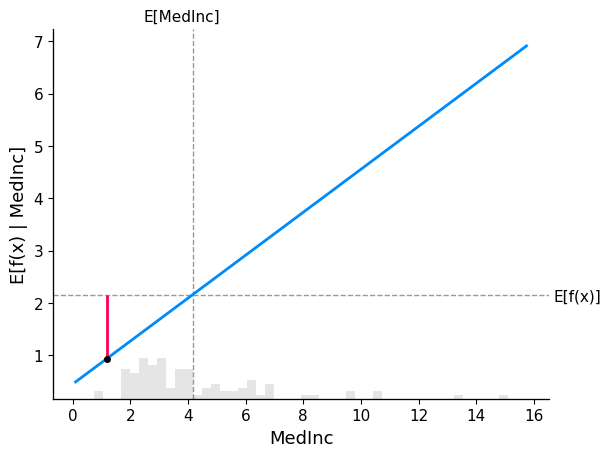

In [243]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[indice_muestra : indice_muestra + 1, :],
)

In [242]:
print("Valor independiente en la muestra 20 x:",shap_values[indice_muestra,"MedInc"].data)
print("Valor real del precio en la muestra 20 f(x):",y_train[indice_muestra])
print("Espectativa de salida E[f(X)]:",shap_values.base_values[indice_muestra])
print("E[f(X)] + SHAP:",shap_values.base_values[indice_muestra] + shap_values[indice_muestra, "MedInc"].values)
print("Valor SHAP:",shap_values[indice_muestra, "MedInc"].values)

Valor independiente en la muestra 20 x: 1.1859
Valor real del precio en la muestra 20 f(x): 2.417
Espectativa de salida E[f(X)]: 2.160804011001239
E[f(X)] + SHAP: 0.9384723231832828
Valor SHAP: -1.2223316878179564


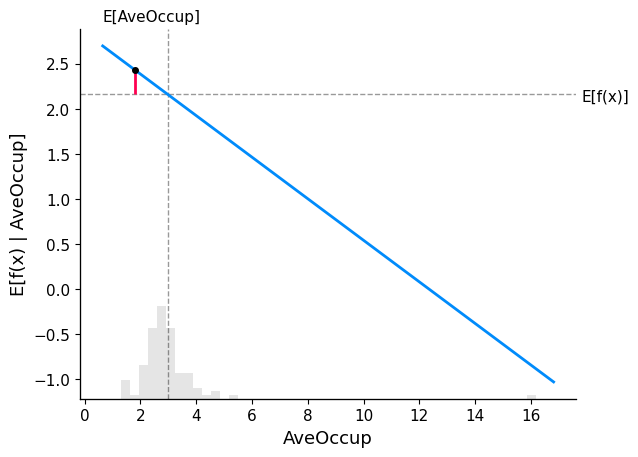

In [241]:
shap.partial_dependence_plot(
    "AveOccup",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[indice_muestra : indice_muestra + 1, :],
)

In [239]:
print("Valor independiente en la muestra 20 x:",shap_values[indice_muestra,"AveOccup"].data)
print("Valor real del precio en la muestra 20 f(x):",y_train[indice_muestra])
print("Espectativa de salida E[f(X)]:",shap_values.base_values[indice_muestra])
print("E[f(X)] + SHAP:",shap_values.base_values[indice_muestra] + shap_values[indice_muestra, "AveOccup"].values)
print("Valor SHAP:",shap_values[indice_muestra, "AveOccup"].values)

Valor independiente en la muestra 20 x: 1.8134878819810327
Valor real del precio en la muestra 20 f(x): 2.417
Espectativa de salida E[f(X)]: 2.160804011001239
E[f(X)] + SHAP: 2.4284274307548968
Valor SHAP: 0.2676234197536575


La estrecha correspondencia entre el clásico gráfico de dependencia parcial y los valores SHAP significa que si representamos gráficamente el valor SHAP para una característica específica en todo un conjunto de datos, trazaremos exactamente una versión centrada en la media del gráfico de dependencia parcial para esa característica:

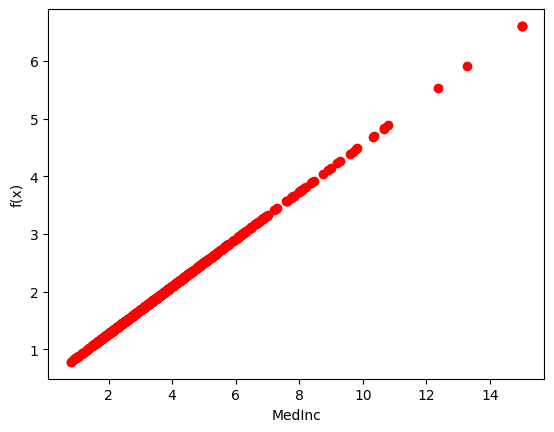

In [195]:
Y_shap = shap_values.base_values[:] + shap_values[:, "MedInc"].values
X_shap = shap_values[:,"MedInc"].data
# Graficar
plt.scatter(X_shap, Y_shap,color='r')
plt.xlabel("MedInc")
plt.ylabel("f(x)")
plt.show()

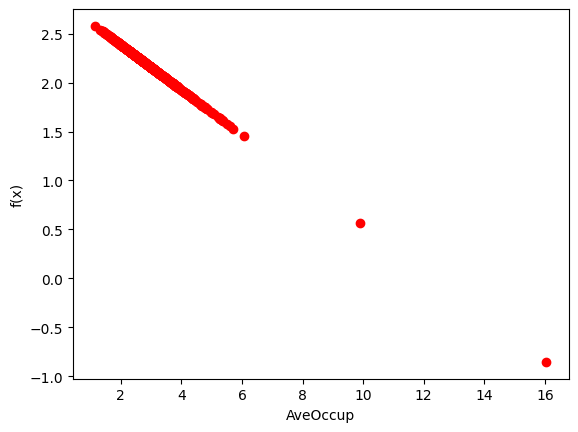

In [194]:
Y_shap = shap_values.base_values[:] + shap_values[:, "AveOccup"].values
X_shap = shap_values[:,"AveOccup"].data
# Graficar
plt.scatter(X_shap, Y_shap,color='r')
plt.xlabel("AveOccup")
plt.ylabel("f(x)")
plt.show()

## La naturaleza aditiva de los valores Shapley

Una de las propiedades fundamentales de los valores Shapley es que siempre suman la diferencia entre el resultado del juego cuando todos los jugadores están presentes y el resultado del juego cuando ningún jugador está presente. Para los modelos de aprendizaje automático, esto significa que los valores SHAP de todas las características de entrada siempre sumarán la diferencia entre la salida del modelo de referencia (esperada) y la salida actual del modelo para la predicción que se está explicando. La forma más fácil de ver esto es a través de un gráfico de cascada que comienza en nuestra expectativa previa de fondo para el precio de una vivienda y luego agrega características una a una hasta llegar a la salida actual del modelo:

In [238]:
print("Valores SHAP en la muestra 20:")
display(shap_values_values.iloc[indice_muestra])

Valores SHAP en la muestra 20:


MedInc       -1.222332
HouseAge      0.207592
AveRooms      0.256761
AveBedrms    -0.030645
Population    0.013348
AveOccup      0.267623
Latitude     -1.032259
Longitude     1.259236
Name: 20, dtype: float64

In [213]:
fx=shap_values.base_values[indice_muestra]
for i in shap_values_values.iloc[indice_muestra]:
	fxp = fx + i
	print(f"{i} + {fx} = {fxp}")
	fx=fxp

-1.2223316878179564 + 2.160804011001239 = 0.9384723231832828
0.2075916325190298 + 0.9384723231832828 = 1.1460639557023127
0.2567605703603766 + 1.1460639557023127 = 1.4028245260626893
-0.030645212791689556 + 1.4028245260626893 = 1.3721793132709996
0.01334794921670136 + 1.3721793132709996 = 1.385527262487701
0.2676234197536575 + 1.385527262487701 = 1.6531506822413586
-1.0322592614761505 + 1.6531506822413586 = 0.6208914207652081
1.2592361689838567 + 0.6208914207652081 = 1.8801275897490648


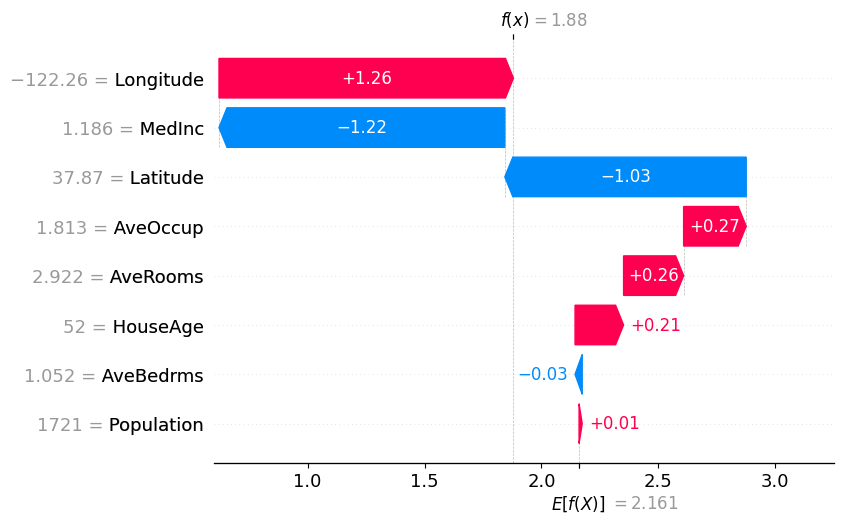

In [236]:
shap.plots.waterfall(shap_values[indice_muestra])

In [237]:
print("Valor real del precio en la muestra 20:",y_train[indice_muestra])
print("Valor predicho por f(x) en la muestra 20:",model.predict(X_train.iloc[indice_muestra:indice_muestra+1]))
print("Espectativa de salida E[f(x)]:",shap_values.base_values[indice_muestra])
print("Valores reales en la muestra 20:")
display(X_train.iloc[indice_muestra])

Valor real del precio en la muestra 20: 2.417
Valor predicho por f(x) en la muestra 20: [1.88012759]
Espectativa de salida E[f(x)]: 2.160804011001239
Valores reales en la muestra 20:


MedInc           1.185900
HouseAge        52.000000
AveRooms         2.922023
AveBedrms        1.051633
Population    1721.000000
AveOccup         1.813488
Latitude        37.870000
Longitude     -122.260000
Name: 461, dtype: float64

## Un gráfico de resumen simple tipo beeswarm

El gráfico de resumen beeswarm está diseñado para mostrar un resumen densamente informativo de cómo las principales características en un conjunto de datos afectan la salida del modelo. Cada instancia de la explicación dada se representa con un único punto en cada fila de características. La posición x del punto está determinada por el valor SHAP (shap_values.value[instancia, característica]) de esa característica, y los puntos se "amontonan" a lo largo de cada fila de características para mostrar la densidad. El color se utiliza para mostrar el valor original de una característica (shap_values.data[instancia, característica]).

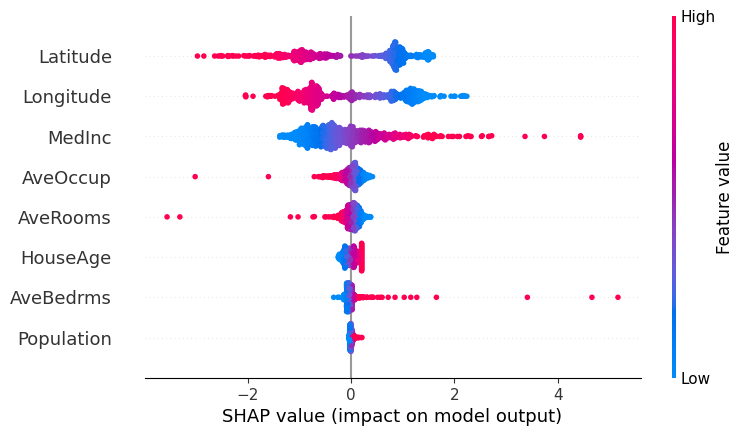

In [224]:
shap.plots.beeswarm(shap_values)

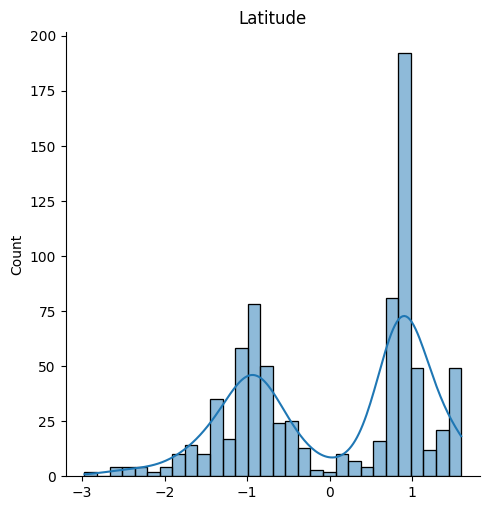

In [233]:
sns.displot(shap_values[:, "Latitude"].values, bins=30, kde=True).set(title='Latitude')

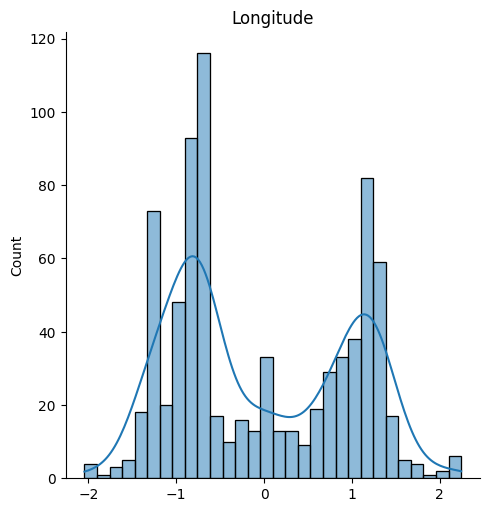

In [234]:
sns.displot(shap_values[:, "Longitude"].values, bins=30, kde=True).set(title='Longitude')

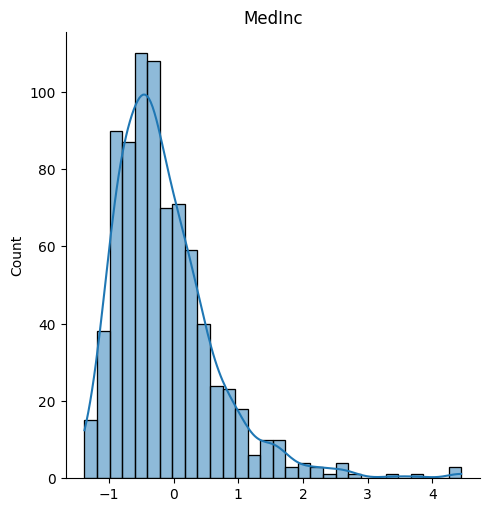

In [235]:
sns.displot(shap_values[:, "MedInc"].values, bins=30, kde=True).set(title='MedInc')

<AxesSubplot:xlabel='None', ylabel='None'>

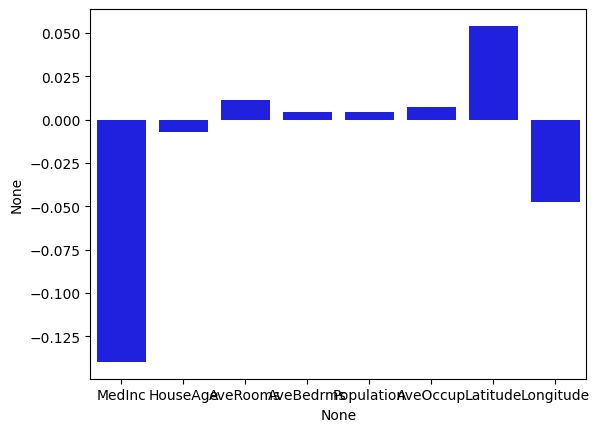

In [246]:
# Seaborn gráfico de promedio de SHAP values `shap_values.values`
sns.barplot(x=shap_values_values.columns, y=shap_values_values.mean(), color="b")

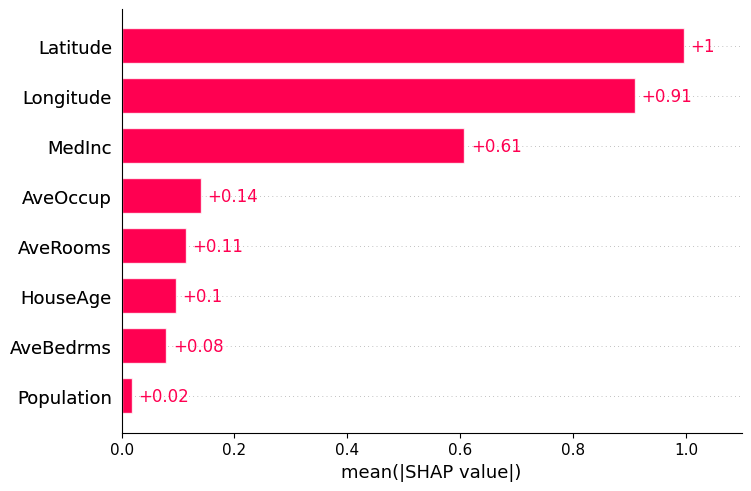

In [244]:
shap.plots.bar(shap_values)